In [1]:
import sys
old_stdout = sys.stdout
from two_stream import Two_stream

import cv2
import numpy as np
import configparser


In [2]:
f = open('/dev/null', 'w')
sys.stdout = f

two_stream = Two_stream('./files/config.config')

config = configparser.ConfigParser()
config.read('./files/config.config')

size = (ch,h,w) = (config['OpticalFlow']['channel'],
                   int(config['DataConfig']['image_height']),int(config['DataConfig']['image_width'])) #(20,256,256)

## read images
img1 = cv2.imread("LK_optical_flow/files/img_00000.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1,(w,h)).astype(np.uint8)

img2 = cv2.imread("LK_optical_flow/files/img_00001.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2,(w,h)).astype(np.uint8)

two_stream(img1, img2)

sys.stdout = old_stdout
print("\t[Info] finish one iter test")

	[Info] finish one iter test


# Demo Video

In [ ]:
from LK_optical_flow.utils import showarray
from two_stream import Two_stream

import os, sys, cv2, time
old_stdout = sys.stdout

import configparser
import numpy as np

from contextlib import contextmanager

@contextmanager
def silence_stdout():
    old_target = sys.stdout
    try:
        with open(os.devnull, "w") as new_target:
            sys.stdout = new_target
            yield new_target
    finally:
        sys.stdout = old_target
        

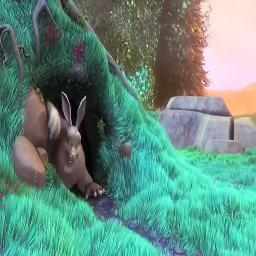

In [ ]:
config = configparser.ConfigParser()
config.read('./files/config.config')

size = (ch,h,w) = (config['OpticalFlow']['channel'],
                   int(config['DataConfig']['image_height']),int(config['DataConfig']['image_width'])) #(20,256,256)

fps_list = []
start,end,sec = 0,0,1e-4

# put demo video
cap = cv2.VideoCapture('LK_optical_flow/files/Big.Buck.Bunny.mp4')

prev_frame = np.zeros((h,w,3)).astype(np.uint8)
while(True):
    start = time.time()
    
    ret,frame = cap.read()
    if ret:
        curr_frame = cv2.resize(frame, (h, w))
        
        with silence_stdout():
            output = two_stream(curr_frame, prev_frame)
        print(output)
        
        
        prev_frame = curr_frame
        
        ####################
        showarray(curr_frame, 1/sec, show_meta=False)
    else:
        break

    end = time.time()
    sec = end-start
    fps_list.append(1/sec)

print(f"avg fps:{sum(fps_list)/len(fps_list)}")